## Naive Bayes Model

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix, f1_score

## Load Data

In [2]:
df = pd.read_csv('./data/reddit_df.csv')
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

In [3]:
df.head()

,real,title
0,1,minimum wage workers cant afford rent anywhere...
1,1,burger king workers write ‘we quit’ sign walk ...
2,1,rents going roof across much us economy tries ...
3,1,baltimore city schools 41 high school students...
4,1,target walgreens make drastic changes due incr...


In [4]:
X = df['title']
y = df['real']

In [5]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

## Baseline Accuracy

In [6]:
y.value_counts(normalize=True)

1    0.508027
0    0.491973
Name: real, dtype: float64

## Bernoulli Naive Bayes

In [7]:
pipe = Pipeline([
    ('cvec',CountVectorizer()),
    ('nb',BernoulliNB())
])
pipe_params = {
    'cvec__max_features':[2_000, 3_000, 4_000, 5_000],
    'cvec__min_df'      :[2,3],
    'cvec__max_df'      :[.9, .95],
    'cvec__ngram_range' :[(1,1), (1,2)]
}
gs_cvec = GridSearchCV(pipe,param_grid = pipe_params, cv=5)

In [8]:
gs_cvec.fit(X_train,y_train);

In [9]:
print('Train score', cross_val_score(pipe,X_train,y_train,cv=10).mean())
print('Test score', gs_cvec.score(X_test,y_test))
y_pred = gs_cvec.predict(X_test)
print('f1 score',f1_score(y_test,y_pred))

Train score 0.845612968591692
Test score 0.8442118226600985
f1 score 0.8452599388379204


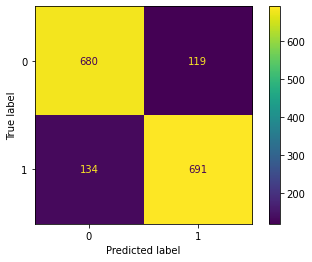

In [10]:
plot_confusion_matrix(gs_cvec,X_test,y_test)

In [14]:
gs_cvec.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 3000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1)}

## Important Features

In [16]:
pipe = Pipeline([
    ('cvec',CountVectorizer(max_df=0.9,max_features=3000,min_df=2,ngram_range=(1,1))),
    ('nb',BernoulliNB())
])
pipe.fit(X_train,y_train);

In [25]:
# Retrieve the coefficients, turn into dataframe, and show the largest coefficient
coef = pipe.named_steps['nb'].coef_
coef_df = pd.DataFrame({'coefs':coef[0]},index=pipe.named_steps['cvec'].get_feature_names())
coef_df.nlargest(10,'coefs')

,coefs
us,-2.271470
police,-2.381337
says,-2.572731
man,-2.733414
arrested,-3.162082
new,-3.176267
officer,-3.297627
killed,-3.330417
covid19,-3.347224
trump,-3.347224


Words that has higher weight are related to police activities. 